In [1]:
import cv2
import os
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

train_dir = './train'

# 确认视频数据

In [2]:
video_path = os.path.join(train_dir, 'scene_00.mp4')
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print('width:', cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print('height:', cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('fps:', fps)
print('frame_count:', frame_count)

width: 1920.0
height: 1080.0
fps: 10.0
frame_count: 236.0


# 每帧图像

In [3]:
images = []
elapsed_times = []
frame_id = 0
elapsed_sec = 0
while True:
    ret, frame = cap.read()
    hours, minutes = elapsed_sec//3600, elapsed_sec%3600
    minutes, seconds = minutes//60, minutes%60
    h, m, s, ms = '{:02d}'.format(int(hours)), '{:02d}'.format(int(minutes)), '{:02d}'.format(int(seconds)), '{:05d}'.format(int((seconds - int(seconds))*(10**5)))
    frame_id += 1
    elapsed_sec = frame_id/fps
    if not ret:
        break
    else:
        images.append(frame[:,:,::-1])
        elapsed_times.append('{}:{}:{}:{}'.format(h, m, s, ms))
cap.release()


# 确认

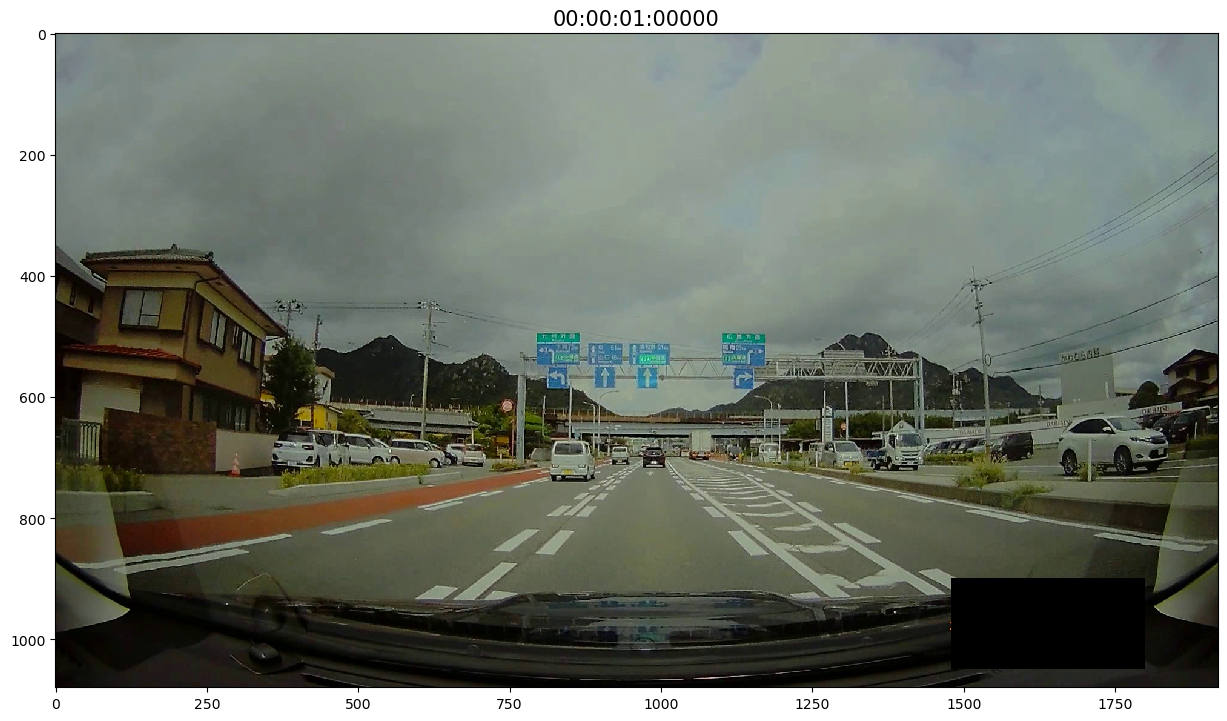

In [4]:
frame_id = 10
image = images[frame_id]
elapsed_time = elapsed_times[frame_id]
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(image)
ax.set_title(elapsed_time, fontsize=15)
plt.show()

# 确认标注数据

In [5]:
annotation_path = os.path.join(train_dir, 'scene_00.json')
with open(annotation_path, encoding='utf-8') as f:
    annotation = json.load(f)

In [6]:
def vis_annotation(image, elapsed_time, ann, colors, texts):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.imshow(image)
    ax.set_title(elapsed_time, fontsize=15)
    for l, bboxes in ann['labels'].items():
        print('{}: {}'.format(l, texts[l]))
        for bbox in bboxes:
            left = min(bbox[0][0], bbox[1][0])
            top = min(bbox[0][1], bbox[1][1])
            width = abs(bbox[1][0]-bbox[0][0])
            height = abs(bbox[1][1]-bbox[0][1])
            rect = patches.Rectangle((left, top), width, height,
                                     linewidth=1,
                                     edgecolor=colors[l],
                                     facecolor='none')
            ax.add_patch(rect)
            bbox_props = dict(boxstyle='square,pad=0', linewidth=1, facecolor=colors[l], edgecolor=colors[l])
            ax.text(left, top, texts[l], ha='left', va='bottom', rotation=0,size=15, bbox=bbox_props)
    plt.show()

In [7]:
ann = sorted(annotation, key=lambda x:x['frame_id'])[frame_id]

6个类：
要補修-1.区画線
要補修-2.道路標識
要補修-3.照明
補修不要-1.区画線
補修不要-2.道路標識
補修不要-3.照明

In [8]:
colors = {
    '要補修-1.区画線': (1, 0, 0, 1),    
    '要補修-2.道路標識': (0, 1, 0, 1),  
    '要補修-3.照明': (0, 0, 1, 1),      
    '補修不要-1.区画線': (1, 1, 0, 1),   
    '補修不要-2.道路標識': (1, 0, 1, 1), 
    '補修不要-3.照明': (0, 1, 1, 1)     
}


In [9]:
texts = {
    '要補修-1.区画線': 'need to repair: line',    
    '要補修-2.道路標識': 'need to repair: sign',  
    '要補修-3.照明': 'need to repair: light',      
    '補修不要-1.区画線': 'no need to repair: line',   
    '補修不要-2.道路標識': 'no need to repair: sign', 
    '補修不要-3.照明': 'no need to repair: light'     
}

查看

補修不要-1.区画線: no need to repair: line
要補修-1.区画線: need to repair: line
補修不要-2.道路標識: no need to repair: sign
補修不要-3.照明: no need to repair: light


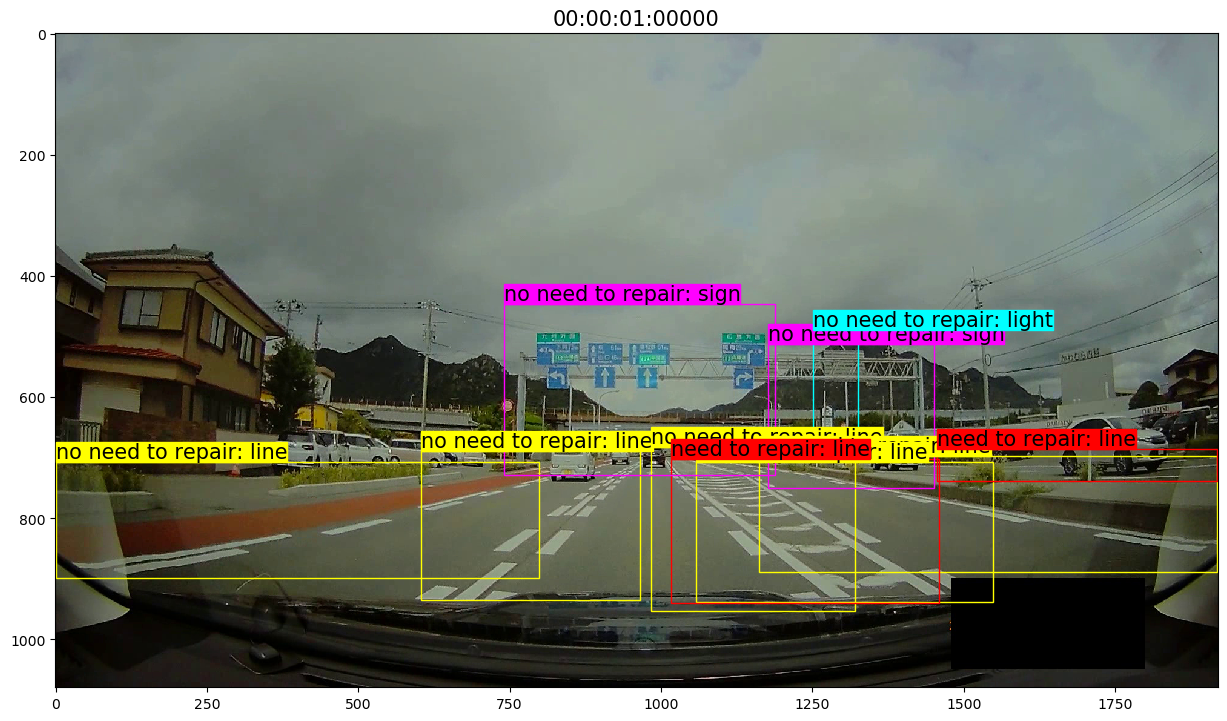

In [10]:
vis_annotation(image, elapsed_time, ann, colors, texts)

# 看各类的矩形框数量

In [13]:
total_bboxes = {'要補修-1.区画線': 0,
                '要補修-2.道路標識': 0,
                '要補修-3.照明': 0,
                '補修不要-1.区画線': 0,
                '補修不要-2.道路標識': 0,
                '補修不要-3.照明': 0}
for file_path in os.listdir(train_dir):
    file_name, ext = os.path.splitext(file_path)
    if ext == '.json':
        num_bboxes = {'要補修-1.区画線': 0,
                      '要補修-2.道路標識': 0,
                      '要補修-3.照明': 0,
                      '補修不要-1.区画線': 0,
                      '補修不要-2.道路標識': 0,
                      '補修不要-3.照明': 0}
        with open(os.path.join(train_dir, file_path), encoding='utf-8') as f:
            ann = json.load(f)
        for frames in ann:
            for l, bboxes in frames['labels'].items():
                total_bboxes[l] += len(bboxes)
                num_bboxes[l] += len(bboxes)
        print(file_name)
        for k, v in num_bboxes.items():
            print('  {}: {}'.format(k, v))
print('\ntotal')
for k, v in total_bboxes.items():
    print('  {}: {}'.format(k, v))

scene_08
  要補修-1.区画線: 261
  要補修-2.道路標識: 1
  要補修-3.照明: 0
  補修不要-1.区画線: 696
  補修不要-2.道路標識: 86
  補修不要-3.照明: 56
scene_00
  要補修-1.区画線: 1709
  要補修-2.道路標識: 24
  要補修-3.照明: 1
  補修不要-1.区画線: 249
  補修不要-2.道路標識: 310
  補修不要-3.照明: 454
scene_16
  要補修-1.区画線: 548
  要補修-2.道路標識: 39
  要補修-3.照明: 1
  補修不要-1.区画線: 711
  補修不要-2.道路標識: 137
  補修不要-3.照明: 140
scene_19
  要補修-1.区画線: 512
  要補修-2.道路標識: 0
  要補修-3.照明: 0
  補修不要-1.区画線: 724
  補修不要-2.道路標識: 98
  補修不要-3.照明: 129
scene_03
  要補修-1.区画線: 799
  要補修-2.道路標識: 0
  要補修-3.照明: 14
  補修不要-1.区画線: 251
  補修不要-2.道路標識: 82
  補修不要-3.照明: 282
scene_15
  要補修-1.区画線: 640
  要補修-2.道路標識: 0
  要補修-3.照明: 0
  補修不要-1.区画線: 791
  補修不要-2.道路標識: 88
  補修不要-3.照明: 144
scene_05
  要補修-1.区画線: 1209
  要補修-2.道路標識: 20
  要補修-3.照明: 0
  補修不要-1.区画線: 60
  補修不要-2.道路標識: 583
  補修不要-3.照明: 143
scene_18
  要補修-1.区画線: 880
  要補修-2.道路標識: 4
  要補修-3.照明: 0
  補修不要-1.区画線: 452
  補修不要-2.道路標識: 115
  補修不要-3.照明: 40
scene_21
  要補修-1.区画線: 747
  要補修-2.道路標識: 76
  要補修-3.照明: 21
  補修不要-1.区画線: 318
  補修不要-2.道路標識: 265
  補修不要-3.照明: 362
scene_04


# 按每帧保存图像

In [14]:
def cut_video(video_path, out_img_dir):
    print('\n'+video_path)
    frame_id = 0
    video_name = os.path.splitext(os.path.basename(video_path))[0]
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    print('  width:', cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    print('  height:', cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    print('  fps:', fps)
    print('  frame_count:', frame_count)
    count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        out_filename = '{}_{:03d}.jpg'.format(video_name, frame_id)
        cv2.imwrite(os.path.join(out_img_dir, out_filename), frame)
        count += 1
        frame_id += 1

    cap.release()
    print('  total frames:', count)

out_img_dir = './traindata'
os.makedirs(out_img_dir, exist_ok=True)
for i in range(23):
    video_path = os.path.join(train_dir, 'scene_{:02d}.mp4'.format(i))
    cut_video(video_path, out_img_dir)


./train/scene_00.mp4
  width: 1920.0
  height: 1080.0
  fps: 10.0
  frame_count: 236.0
  total frames: 236

./train/scene_01.mp4
  width: 1920.0
  height: 1080.0
  fps: 10.0
  frame_count: 108.0
  total frames: 108

./train/scene_02.mp4
  width: 1920.0
  height: 1080.0
  fps: 10.0
  frame_count: 236.0
  total frames: 236

./train/scene_03.mp4
  width: 1920.0
  height: 1080.0
  fps: 10.0
  frame_count: 236.0
  total frames: 236

./train/scene_04.mp4
  width: 1920.0
  height: 1080.0
  fps: 10.0
  frame_count: 236.0
  total frames: 236

./train/scene_05.mp4
  width: 1920.0
  height: 1080.0
  fps: 10.0
  frame_count: 236.0
  total frames: 236

./train/scene_06.mp4
  width: 1920.0
  height: 1080.0
  fps: 10.0
  frame_count: 236.0
  total frames: 236

./train/scene_07.mp4
  width: 1920.0
  height: 1080.0
  fps: 10.0
  frame_count: 236.0
  total frames: 236

./train/scene_08.mp4
  width: 1920.0
  height: 1080.0
  fps: 10.0
  frame_count: 236.0
  total frames: 236

./train/scene_09.mp4
  widt

# 切割并保存对应的json文件

In [15]:
for i in range(23):
    annotation_name = 'scene_{:02d}'.format(i)
    annotation_path = os.path.join(train_dir, '{}.json'.format(annotation_name))
    print(annotation_path)
    with open(annotation_path, encoding='utf-8') as f:
        annotation = json.load(f)
    for data in annotation:
        with open(os.path.join(out_img_dir, annotation_name+'_{:03}.json'.format(data['frame_id'])), 'w', encoding='utf-8') as f:
            json.dump(data, f, ensure_ascii=False, indent=4)

./train/scene_00.json
./train/scene_01.json
./train/scene_02.json
./train/scene_03.json
./train/scene_04.json
./train/scene_05.json
./train/scene_06.json
./train/scene_07.json
./train/scene_08.json
./train/scene_09.json
./train/scene_10.json
./train/scene_11.json
./train/scene_12.json
./train/scene_13.json
./train/scene_14.json
./train/scene_15.json
./train/scene_16.json
./train/scene_17.json
./train/scene_18.json
./train/scene_19.json
./train/scene_20.json
./train/scene_21.json
./train/scene_22.json
